# Model Building

In [58]:
import pickle

import nltk

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from tools import misc

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
with open('raw_data/corpus_df.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
PATTERN = r'[\u0621-\u064A]+'
MAX_FEATURES = 10_000
STOPWORDS_URL = 'https://raw.githubusercontent.com/mohataher/arabic-stop-words/master/list.txt'
TEST_SIZE = 0.2
SEED = 42

In [4]:
data.head()

,cls,text
id,,
0,sports,أعلن المدرب النمسوي لبوروسيا دورتموند بيتر شتو...
1,sports,ذكرت وسائل الإعلام البلغارية الجمعة ان العداءة...
2,sports,برز اسم نجم مانشستر يونايتد رايان غيغز (36 عام...
3,sports,قال مدرب نادي انتر ميلان الإيطالي خوزيه موريني...
4,sports,بيتر تشيك: حارس مرمى تشيكي ولد في 20 مايو عام ...


In [5]:
X = data['text']
y = data['cls']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED, stratified=y)

### Vectorizers

In [7]:
stopwords = misc.get_stopwords(STOPWORDS_URL)

In [8]:
countvec = CountVectorizer(
    lowercase=False,
    stop_words=stopwords,
    strip_accents='unicode',
    token_pattern=PATTERN,
    max_features=MAX_FEATURES
)

tfidfvec = TfidfVectorizer(
    lowercase=False,
    stop_words=stopwords,
    strip_accents='unicode',
    token_pattern=PATTERN,
    max_features=MAX_FEATURES
)

In [ ]:
X_train_cv = countvec.fit_transform(X_train)
X_test_cv = countvec.transform(X_test)
cv_vocab = countvec.vocabulary_

X_train_tf = tfidfvec.fit_transform(X_train)
X_test_tf = tfidfvec.transform(X_test)
tf_vocab = tfidfvec.vocabulary_

## Naïve Bayes

In [9]:
nb = MultinomialNB()

In [9]:
rfc = RandomForestClassifier()

gbc = GradientBoostingClassifier()

svc = SVC()

In [12]:
pipe_nb = Pipeline([
    ('Count Vectorizer', countvec),
    ('Naive Bayes', nb)
], verbose=True)

pipe_rfc = Pipeline([
    ('Count Vectorizer', countvec),
    ('Random Forest Classifier', rfc)
], verbose=True)

pipe_gbc = Pipeline([
    ('Count Vectorizer', countvec),
    ('Gradient Boosting Classifier', gbc)
], verbose=True)

pipe_svc = Pipeline([
    ('Count Vectorizer', countvec),
    ('Support Vector Classifier', svc)
], verbose=True)

In [56]:
pipe_nb.fit(X_train, y_train)
y_hat_train = pipe_nb.predict(X_train)
y_hat_test = pipe_nb.predict(X_test)

cm_train = confusion_matrix(y_train, y_hat_train, labels=pipe_nb.steps[1])
cm_test = confusion_matrix(y_test, y_hat_test)

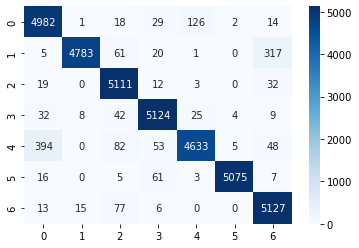

In [57]:
sns.heatmap(
    cm_train,
    annot=True,
    fmt='.0f',
    cmap='Blues',
    xticklabels=
)

In [12]:
pipelines = [pipe_nb, pipe_rfc, pipe_gbc, pipe_svc]

In [13]:
pipelines_fitted = []

for pipeline in pipelines:
    pipelines_fitted.append(pipeline.fit(X_train, y_train))

/Users/iansharff/opt/anaconda3/envs/arabicnews/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:382: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['اب', 'ابتدا', 'ابدا', 'ابريل', 'ابو', 'اجمع', 'احدى', 'اخ', 'اخبر', 'اخذ', 'اخو', 'اذ', 'اذار', 'اذما', 'اذن', 'اربع', 'اربعاء', 'اربعماية', 'اربعمية', 'ارتد', 'ارى', 'ازاء', 'اسكن', 'اصلا', 'اض', 'اطعم', 'اعطى', 'اعلم', 'اغسطس', 'افريل', 'افعل', 'افعله', 'اقبل', 'اكتوبر', 'ال', 'الالاء', 'الالى', 'الفى', 'اليك', 'اليكم', 'اليكما', 'اليكن', 'ام', 'امامك', 'امد', 'امين', 'انا', 'اناء', 'انبا', 'انت', 'انتم', 'انتما', 'انتن', 'انشا', 'انفا', 'انفك', 'انى', 'اه', 'اها', 'اهلا', 'اوت', 'اوشك', 'اولاء', 'اولالك', 'اوليك', 'اوه', 'اى', 'ايا', 'اياك', 'اياكم', 'اياكما', 'اياكن', 'ايان', 'ايانا', 'اياه', 'اياها', 'اياهم', 'اياهما', 'اياهن', 'اياي', 'ايلول', 'اين', 'ايه', 'بخ', 'برح', 'بس', 'بطان', 'بله', 'بوسا', 'بيس', 'تان', 'تانك', 'تبدل', 'تحول', 'تسعماية', 'تس

[Pipeline] .. (step 1 of 2) Processing Count Vectorizer, total=  15.8s
[Pipeline] ....... (step 2 of 2) Processing Naive Bayes, total=   0.1s
[Pipeline] .. (step 1 of 2) Processing Count Vectorizer, total=  15.7s
[Pipeline]  (step 2 of 2) Processing Random Forest Classifier, total=  56.0s
[Pipeline] .. (step 1 of 2) Processing Count Vectorizer, total=  15.8s
[Pipeline]  (step 2 of 2) Processing Gradient Boosting Classifier, total= 3.3min
[Pipeline] .. (step 1 of 2) Processing Count Vectorizer, total=  15.9s
[Pipeline]  (step 2 of 2) Processing Support Vector Classifier, total= 5.3min


In [17]:
y_hat_trains = [pipeline.predict(X_train) for pipeline in pipelines_fitted]

In [18]:
y_hat_tests = [pipeline.predict(X_test) for pipeline in pipelines_fitted]

['culture' 'finance' 'medical' 'politics' 'religion' 'sports' 'tech']


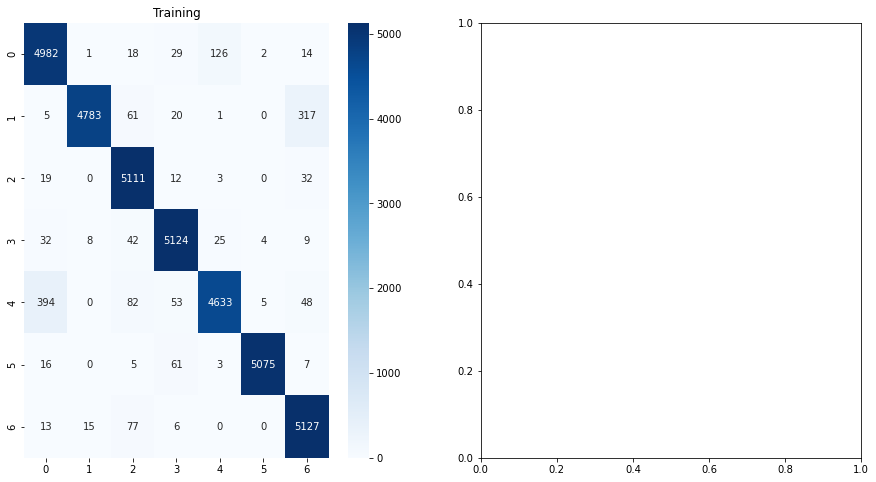

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.heatmap(
    data=confusion_matrix(y_train, y_hat_trains[0], labels=pipelines_fitted[0].steps[1][1].classes_),
    annot=True,
    cmap='Blues',
    fmt='.0f',
    ax=axes[0]
)
axes[0].set_title('Training')
print(pipelines_fitted[0].steps[1][1].classes_)